# Evaluation Metrics for Classification
> This post covers few of the most commonly used evaluation metrics used for classification, when they should be used and their drawbacks

- categories: [metrics, classification]
- badges: true
- comments: true
- search_exclude: false
- image: images/b2_classification-metrics/post.jpeg

In [1]:
#hide
from PIL import Image
from IPython.display import display

In [3]:
#hide 
pic1 = Image.open('../images/b2_classification-metrics/confusion matrix.png')
pic2 = Image.open('../images/b2_classification-metrics/precision.png')
pic3 = Image.open('../images/b2_classification-metrics/recall.png')

### Why do we need a metric in the first place

In machine learning (supervised learning to be exact), our objective is to create a mathematical model that helps us make predictions based on some prior distribution of independent and dependent variables that we have and update the model weights in a way that we minimize loss. The loss function is a mathematical function that helps the algorithm converge, but for layman interpretation, it is not of much use (most of the time).

This is where evaluation metrics help us as, depending on the choice of the metric, they give us an indication of how our model is performing. It is just like evaluating your performance based on your report card in school or your CG in college to assess how you are performing (acadamically at least) - just not that straightforward xD

Some of the most common evaluation metrics, which we will also discuss in this post, are: accuracy, precision, recall, and F1 score. I will leave a few other important metrics to another blog post as they are a bit more difficult to intuitively understand.

### Terminology

Before we delve into how we interpret evaluation metrics, it is important to understand some basic terminology which could look pretty daunting on the surface but is pretty straightforward once you get the hang of it.
For example let's say you are building a simple image classifier that classifies an image as a dog or a cat (I know, I know, very cliché). This is an example of a binary classifier and the following predictions are possible:

- True Positive: When your model predicts that an observation belongs to a class, and that observation actually belongs to that class. You predict something as dog, and it actually is a dog
- True Negative: When you predict that something does not belong to a class, and it actually does not belong to that class. In binary classification, if you predict something to be in one class, that by definition means it does not belong to the other class. Here, say we predict something as not dog (ie, predict it as cat as there are only two classes) and it actually is not a dog (is a cat).
- False Positive: When you predict an observation to a class but it actually does not belong to it. Predicting something as a dog when it was actually a cat.
- False Negative: When you predict an observation does not belong to a class but it actually belongs to it. For example, predicting that an observation is not a dog (is a cat) when in fact it is a dog

Now depending on your project, you might want to prioritise one over the other. In a project like predicting whether a person has Covid or not, you would want to reduce the number of false negatives as much as possible because one wrong prediction could lead to a lot of problems to not only that person, but others around him. Similarly, in a hypothetical project where you want to predict whether a person is a criminal or not you would want to minimise the number of false positives as putting an innocent person behind bars just isn't the best thing to do xD

### Confusion Matrix

Finally, let's look at something called the confustion matrix- something you are more or less certain to encounter whenever you take up a classification problem. For binary classification, it is a simple two by two matrix that summarises our model's predictions. It comes in handy in not only identifying the number of errors our model makes, but also the type of errors made by it- whether it is biased to one class. On the left you have actual class labels that we provide to the model, and on top you have the predicted labels. The grid values, thus, provide the number of observations in each possible bucket (the ones discussed above)

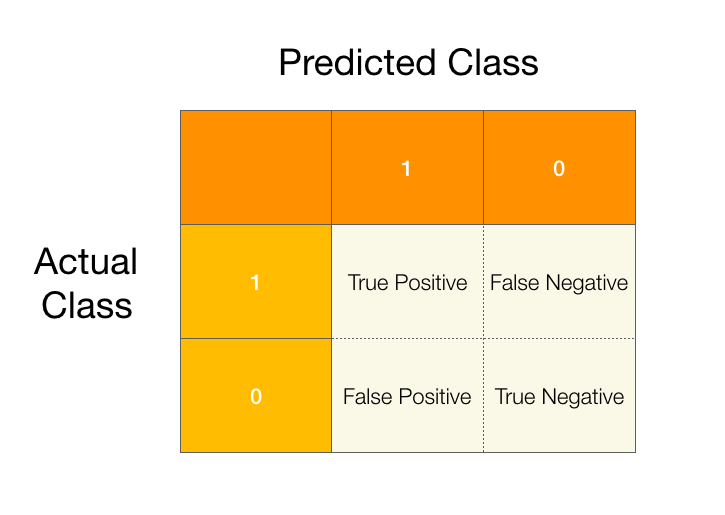

In [5]:
#hide_input
display(pic1)

### Evaluation Metrics

#### Accuracy

It is the simplest metric to calculate, as well as interpret. It is simply the ratio of the number of predictions that our model made correctly to the total number of predictions made. Mathematically, it is the ratio of the sum of true positives and true negatives to the total number of predictions.
On the surface, it might look like a pretty good metric but in practice, accuracy is hardly ever used in the industry. Let's look at an examle to understand why.

Say on a given day you have 10,000 passengers travelling to work of which 10 are Covid positive. As you can guess, the data is very imbalanced; meaning the number of people who are Covid negative far exceeds the number of people that are Covid positive. Now say, we test our model on this and our model classifies all the passengers as Covid negative.

This will give us an accuracy of:

$$ accuracy = (tp + tn) / (tp + tn + fp + fn) $$
$$ accuracy = (0 + 9,990) / (10,000) = 99.9% $$

As we can see, the model got an accuracy of 99.9%, and it might look very impressive. However, one can easily see that the model is more or less useless as classifying everyone as Covid negative could end up being very detrimental. Accuracy is not the correct metric to use when our dataset is so imbalanced. Imbalanced dataset is one in which the number of observations falling in one class (here, Covid negative) far exceeds the number of observations in the other class.

#### Recall

To tackle this problem of imbalanced dataset where minimising the number of false negatives is of utmost priority, we use the recall score. In simple terms, recall score gives you the fraction of **correctly identified positive observations** out of **all the positive observations.** Notice the denominator is the sum of all the actual positive observations.

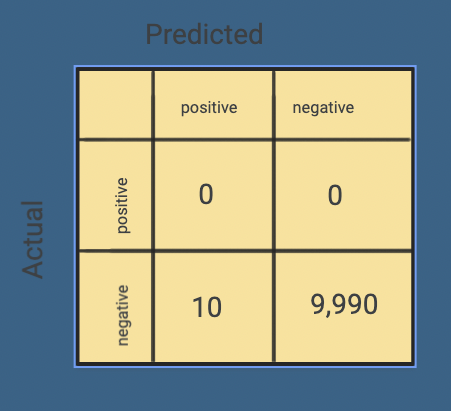

In [6]:
#hide_input
display(pic3)

$$ recall = tp/(tp + fn) $$
$$ recall = 0/(0 + 10) = 0 $$

As you can see, although our accuracy score was almost perfect, we scored 0 in our recall score. Of all the actual positives, we failed to identify even one!

#### Precision

Say that now, after looking that our recall is 0, we change our model in such a way that we predict all the people as Covid positive. This would mean that although our accuracy would be close to 0, our recall will be 1 and we won't make any mistakes in predicting people that are Covid positive. Again, you can very clearly see that our model is fundamentally flawed as predicting everyone as positive would lead to huge medical costs - from screening, to isolating the patients, to providing them with food and other amenities during quarantine. This model, as good as it may be in predicting positives correctly, cannot be used in real life as the cost would be too high. To quantify this, we can look at the precision score of our predictions. Precision gives the fraction of observations **correctly identified as positive** out of all the observations **predicted as positive**.

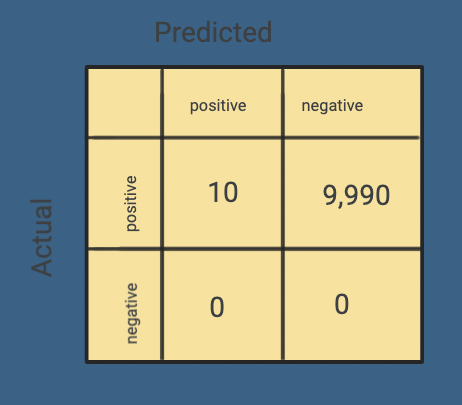

In [8]:
#hide_input
display(pic2)

In this example, our precision would be:
$$ precision = tp/(tp + tn) $$
$$ precision = 10(10 + 9,990) = 0.001 $$

This score is pretty bad to say the least xD

#### F1 Score

For most classification problems- and especially with problems that have an imbalanced class distribution, we will have a tradeoff between precision and recall. We might have cases where both false positives and false negatives are both equally undesirable. In such a case, we would ideally want to maximize both precision and recall but as mentioned above, there will always be a tradeoff between the two as **increasing recall decreases precision and vice versa**. Thus, it becomes important to reduce the problem to one single metric and this is where F1 score helps us. By definition, F1 score is simply the harmonic mean of precision and recall.

$$ F1 = 2 * (precision * recall) / (precision + recall) $$

And just like all the other metrics discussed in this post, the range of F1 Score is [0, 1] where a score closer to 1 means the model is performing well. Now you may be wondering why the harmonic mean is used and not arithmetic (or even geometric). The simple reason behhind this is that harmonic mean discourages large difference in precision and recall more than arithmetic and geometric means. For example, let's say you have a mode A with the follwing metrics:

| Precision | Recall    |
| --------- | --------- |
| 0.7       | 0.8       |

The F1 score for this is 0.746. The arithmetic and geometric means for the same are 0.75 and 0.748 respectively. Now say you have another model B that has the following metrics:

| Precision | Recall    |
| --------- | --------- |
| 0.3       | 0.8       |

As you can see, for this model, the difference in precision and recall values is pretty high. The arithmetic and geometric means for this model are 0.55 and 0.489 respectively. At the same time, the F1 score (or the harmonic mean) for this model is 0.436 which is significantly smaller than both arithmetic mean and geometric mean. This is what is meant by harmonic mean discourages large difference in two values and penalizes them more heavily - making it a better metric.

Thus, for problems where both false negatives and false positives are equally undesirable, F1 score is a very powerful metric.

#### When to use which metric

The choice of metric greatly impacts the evaluation of your model and could result in it making a lot of impact, or, on the flip side, costing the company a lot of money. As a rule of thumb, if your project requires minimizing the number of false negatives (for example, the Covid prediction model we discussed above), you would want to use *recall* as your metric. If it is false positives that are undesirable (for example, the hypothetical court case we discussed above), you would want to use *precision* as your metric. And for projects where both false negatives and false positives are not desirable, *F1 score* is a very good choice of metric.

It is important to remember that these are only a few of the metrics used in the industry, but at the same time their importance and interpretation cannot be discounted.

That's it for this post, where we covered the fundamental classificaiton metrics frequently used in the industy and tackled few of the common doubts associated with them.